## Validation

### Validation: GWL Implementation

In [1]:
from copy import deepcopy

import networkx as nx
import matplotlib.pyplot as plt

from wl import WeisfeilerLeman
from gwl import GradualWeisfeilerLeman

from graph_dataset import GraphDataset

from wl.utils import draw_wl_refined_graph
from gwl.utils import draw_gwl_refined_graph

Loading Data

In [2]:
ptc_fm_graphs = GraphDataset(directory="./data/", dataset="PTC_FM")

The aim is to test various graphs step-by-step to evaluate if the implemented GWL algorithm acually works as intended.

The graphs tested are relatively small, to faciliatate step-by-step debugging.

### Test 1

First I will evaluate graph 20 from __PTC_FM__ dataset is selected. In __PTC_FM__, graphs have both node and edge labels.

Graph 20 consists of 10 nodes and 10 edges.

In [3]:
selected_graph = deepcopy(ptc_fm_graphs.get_graphs()[20])

print(selected_graph)

Graph with 10 nodes and 10 edges


In [4]:
my_graph = nx.Graph()

my_graph.add_edge(1,21)
my_graph.add_edge(1,2)
my_graph.add_edge(1,3)
my_graph.add_edge(4,22)
my_graph.add_edge(4,5)
my_graph.add_edge(4,6)
my_graph.add_edge(4,7)
my_graph.add_edge(8,9)
my_graph.add_edge(8,10)
my_graph.add_edge(8,11)
my_graph.add_edge(8,12)
my_graph.add_edge(8,13)
my_graph.add_edge(8,23)
my_graph.add_edge(14,15)
my_graph.add_edge(14,16)
my_graph.add_edge(14,17)
my_graph.add_edge(14,18)
my_graph.add_edge(14,19)
my_graph.add_edge(14,20)
my_graph.add_edge(14,24)
print(my_graph)

Graph with 24 nodes and 20 edges


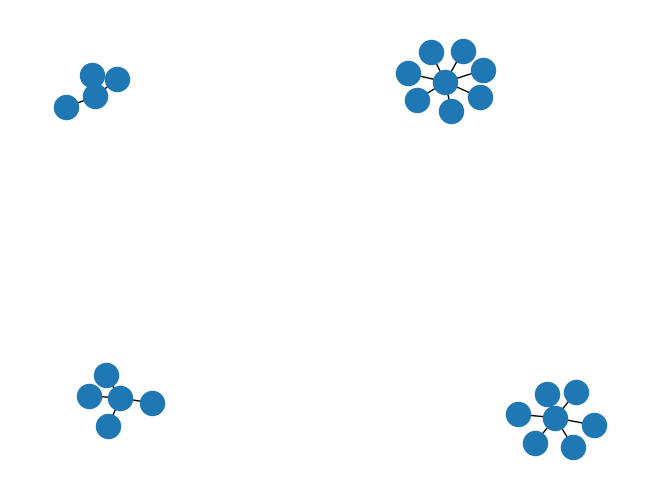

In [11]:
pos = nx.spring_layout(my_graph)
nx.draw(
    my_graph, pos
)
plt.show()

In [19]:
wl = WeisfeilerLeman(refinement_steps=3)

my_graph_wl = deepcopy(my_graph)

wl.refine_color(my_graph_wl)

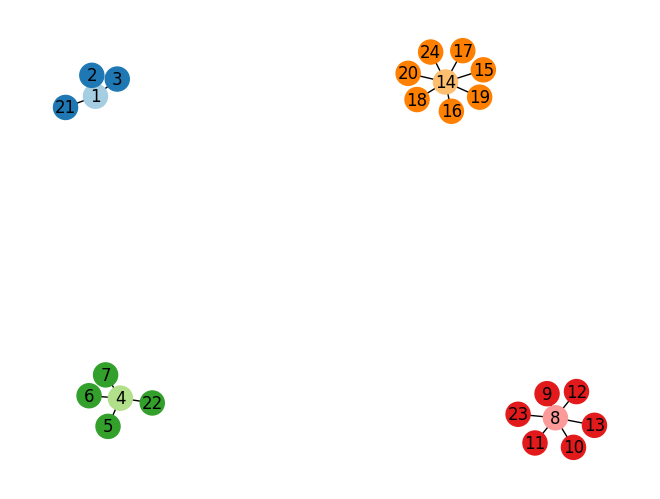

In [20]:
draw_wl_refined_graph(my_graph_wl, pos=pos)

In [21]:
my_graph_gwl = deepcopy(my_graph)

gwl = GradualWeisfeilerLeman(refinement_steps=4, n_cluster=10, cluster_initialization_method="kmeans++")

hierarchy_tree = gwl.refine_color(my_graph_gwl, verbose=True)

{ColorNode with -> Color: 0, Children: [1, 2, 3, 4, 5], associated vertices: [1, 21, 2, 3, 4, 22, 5, 6, 7, 8, 9, 10, 11, 12, 13, 23, 14, 15, 16, 17, 18, 19, 20, 24]}
	|-{ColorNode with -> Color: 1, Children: [6], associated vertices: [14]}
	|	|--{ColorNode with -> Color: 6, Children: [14], associated vertices: [14]}
	|	|	|---{ColorNode with -> Color: 14, Children: [22], associated vertices: [14]}
	|	|	|	|----{ColorNode with -> Color: 22, Children: [], associated vertices: [14]}
	|-{ColorNode with -> Color: 2, Children: [7], associated vertices: [1]}
	|	|--{ColorNode with -> Color: 7, Children: [15], associated vertices: [1]}
	|	|	|---{ColorNode with -> Color: 15, Children: [23], associated vertices: [1]}
	|	|	|	|----{ColorNode with -> Color: 23, Children: [], associated vertices: [1]}
	|-{ColorNode with -> Color: 3, Children: [8, 9, 10, 11], associated vertices: [21, 2, 3, 22, 5, 6, 7, 9, 10, 11, 12, 13, 23, 15, 16, 17, 18, 19, 20, 24]}
	|	|--{ColorNode with -> Color: 8, Children: [16]

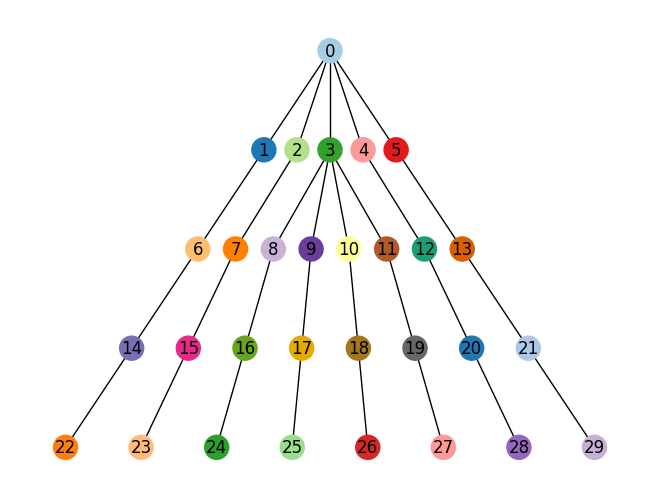

In [22]:
hierarchy_tree.visualize_tree()

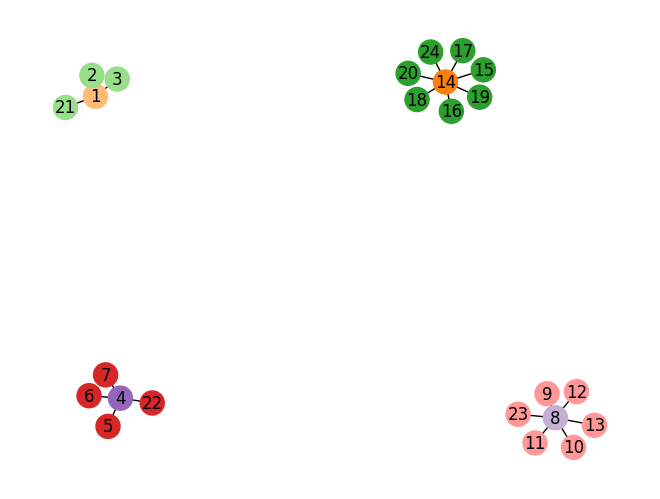

In [23]:
draw_gwl_refined_graph(my_graph_gwl, pos=pos)

In [24]:
feature_vector = gwl.generate_feature_vector(my_graph_gwl)
print(feature_vector)

{0: 24, 2: 1, 7: 1, 15: 1, 23: 1, 3: 20, 9: 3, 17: 3, 25: 3, 4: 1, 12: 1, 20: 1, 28: 1, 10: 4, 18: 4, 26: 4, 5: 1, 13: 1, 21: 1, 29: 1, 11: 6, 19: 6, 27: 6, 1: 1, 6: 1, 14: 1, 22: 1, 8: 7, 16: 7, 24: 7}


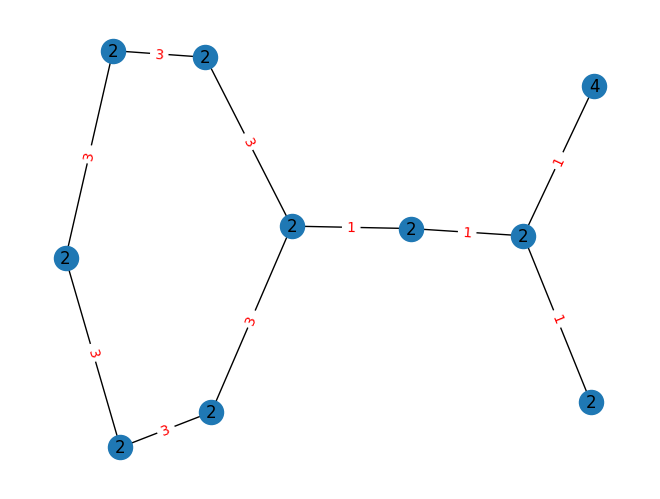

In [10]:
pos = nx.spring_layout(selected_graph)

nx.draw(
    selected_graph, pos,
    labels=nx.get_node_attributes(selected_graph, "label")
)
nx.draw_networkx_edge_labels(
    selected_graph, pos,
    edge_labels=nx.get_edge_attributes(selected_graph, "label"),
    font_color='red'
)

plt.show()

This graph has 2 node labels. Only one node is labeled 4 and all other nodes are labeled 2. 

This graph also contains edge labels namely 1 and 3.

WL

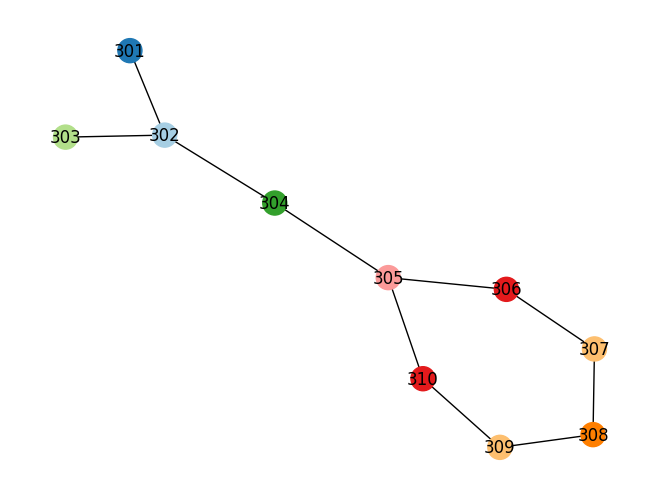

In [5]:
wl = WeisfeilerLeman(refinement_steps=3)

selected_graph = deepcopy(ptc_fm_graphs.get_graphs()[20])

wl.refine_color(selected_graph)

draw_wl_refined_graph(selected_graph, pos=pos)

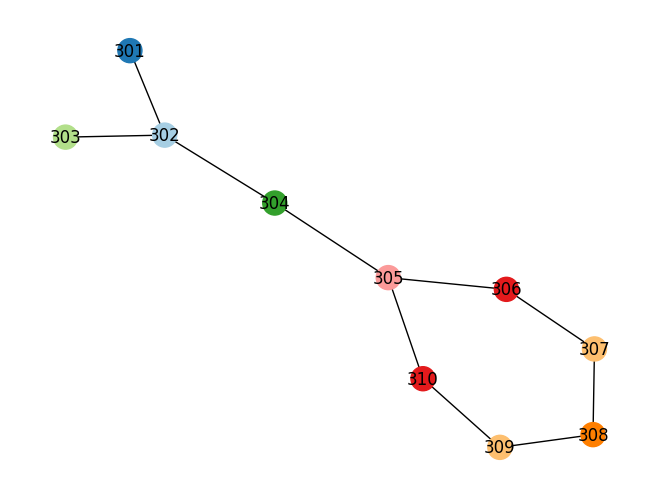

In [6]:
wl = WeisfeilerLeman(refinement_steps=4)

selected_graph = deepcopy(ptc_fm_graphs.get_graphs()[20])

wl.refine_color(selected_graph)

draw_wl_refined_graph(selected_graph, pos=pos)

GWL

At first, the GWLSubtreeKernel will be used to evaluate this graph with h = 3 refinement steps and k = 3 clusters.

In [7]:
selected_graph = deepcopy(ptc_fm_graphs.get_graphs()[20])

gwl = GradualWeisfeilerLeman(refinement_steps=3, n_cluster=3, cluster_initialization_method="kmeans++")

hierarchy_tree = gwl.refine_color(selected_graph, verbose=True)

{ColorNode with -> Color: 0, Children: [1, 2], associated vertices: [302, 301, 303, 304, 305, 306, 307, 308, 309, 310]}
	|-{ColorNode with -> Color: 1, Children: [3, 4, 5], associated vertices: [302, 301, 304, 305, 306, 307, 308, 309, 310]}
	|	|--{ColorNode with -> Color: 3, Children: [7, 8], associated vertices: [302, 304]}
	|	|	|---{ColorNode with -> Color: 7, Children: [13], associated vertices: [304]}
	|	|	|	|----{ColorNode with -> Color: 13, Children: [], associated vertices: [304]}
	|	|	|---{ColorNode with -> Color: 8, Children: [14], associated vertices: [302]}
	|	|	|	|----{ColorNode with -> Color: 14, Children: [], associated vertices: [302]}
	|	|--{ColorNode with -> Color: 4, Children: [9, 10], associated vertices: [305, 306, 307, 308, 309, 310]}
	|	|	|---{ColorNode with -> Color: 9, Children: [15], associated vertices: [305]}
	|	|	|	|----{ColorNode with -> Color: 15, Children: [], associated vertices: [305]}
	|	|	|---{ColorNode with -> Color: 10, Children: [16, 17], associate

Note: The root node here is colored white as this is artificial root node as mentioned in the paper. This applies to all color hierarchy tree for graphs with labeled nodes where number of unique labels are $\gt$ 1

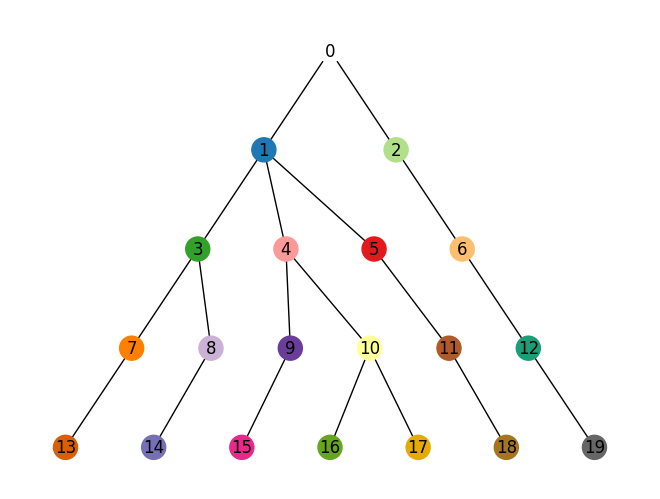

In [8]:
hierarchy_tree.visualize_tree()

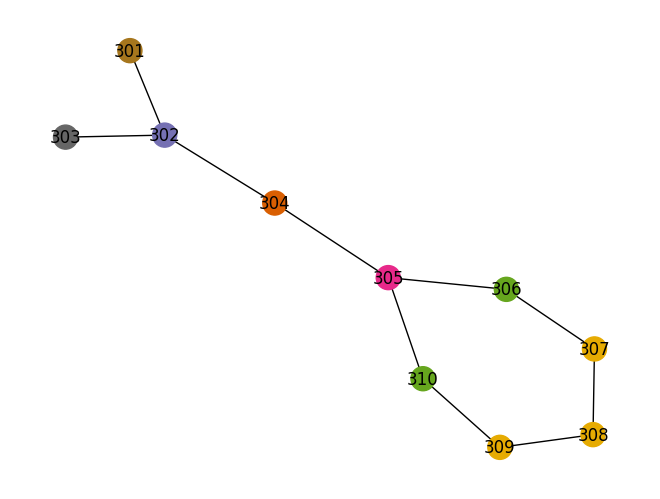

In [9]:
draw_gwl_refined_graph(selected_graph, pos=pos)

Now, the GWLSubtreeKernel will be used to evaluate this graph with h = 4 refinement steps and k = 3 clusters.

In [10]:
selected_graph = deepcopy(ptc_fm_graphs.get_graphs()[20])

gwl = GradualWeisfeilerLeman(refinement_steps=4, n_cluster=3, cluster_initialization_method="kmeans++")

hierarchy_tree = gwl.refine_color(selected_graph, verbose=True)

{ColorNode with -> Color: 0, Children: [1, 2], associated vertices: [302, 301, 303, 304, 305, 306, 307, 308, 309, 310]}
	|-{ColorNode with -> Color: 1, Children: [3, 4, 5], associated vertices: [302, 301, 304, 305, 306, 307, 308, 309, 310]}
	|	|--{ColorNode with -> Color: 3, Children: [7, 8], associated vertices: [302, 304]}
	|	|	|---{ColorNode with -> Color: 7, Children: [13], associated vertices: [304]}
	|	|	|	|----{ColorNode with -> Color: 13, Children: [20], associated vertices: [304]}
	|	|	|	|	|-----{ColorNode with -> Color: 20, Children: [], associated vertices: [304]}
	|	|	|---{ColorNode with -> Color: 8, Children: [14], associated vertices: [302]}
	|	|	|	|----{ColorNode with -> Color: 14, Children: [21], associated vertices: [302]}
	|	|	|	|	|-----{ColorNode with -> Color: 21, Children: [], associated vertices: [302]}
	|	|--{ColorNode with -> Color: 4, Children: [9, 10], associated vertices: [305, 306, 307, 308, 309, 310]}
	|	|	|---{ColorNode with -> Color: 9, Children: [15], as

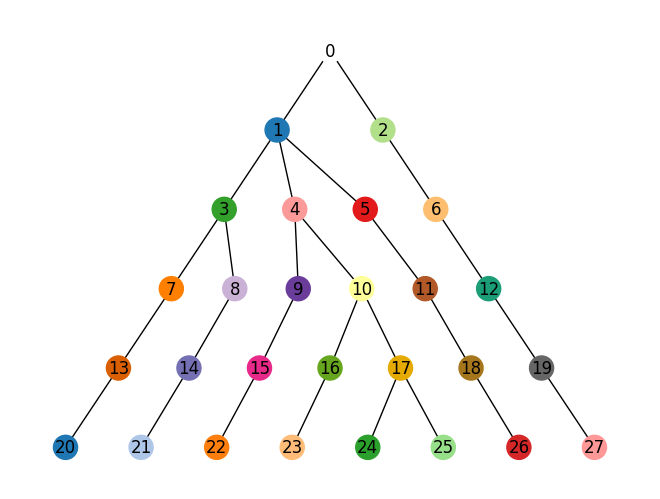

In [11]:
hierarchy_tree.visualize_tree()

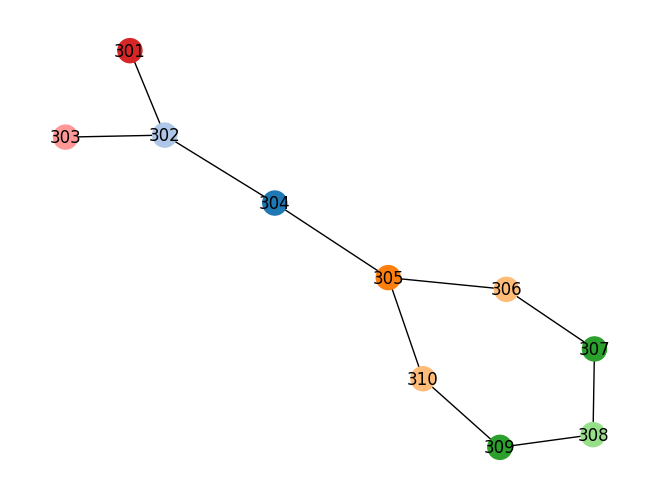

In [12]:
draw_gwl_refined_graph(selected_graph, pos=pos)

### Test 2

In this test, graph 19 from __PTC_FM__ dataset is selected.

Graph 19 is simple path graph with 7 nodes and 6 edges.

In [13]:
selected_graph = deepcopy(ptc_fm_graphs.get_graphs()[19])

print(selected_graph)

Graph with 7 nodes and 6 edges


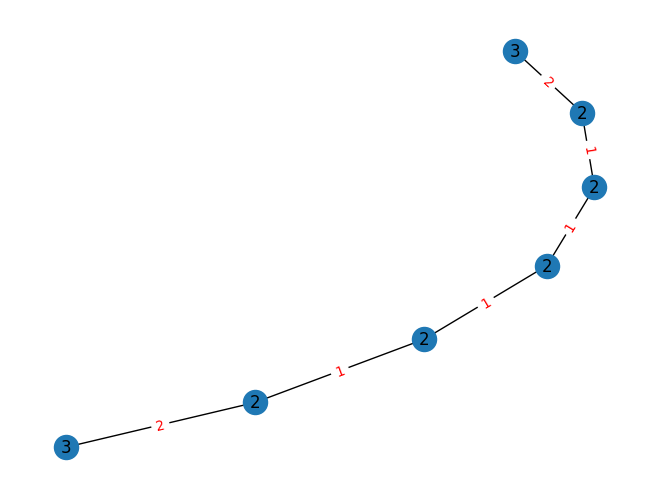

In [14]:
pos = nx.spring_layout(selected_graph)

nx.draw(
    selected_graph, pos,
    labels=nx.get_node_attributes(selected_graph, "label")
)
nx.draw_networkx_edge_labels(
    selected_graph, pos,
    edge_labels=nx.get_edge_attributes(selected_graph, "label"),
    font_color='red'
)

plt.show()

WL

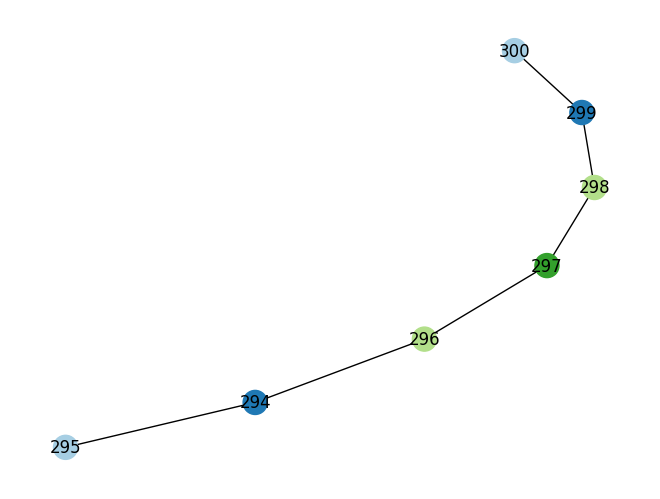

In [15]:
wl = WeisfeilerLeman(refinement_steps=2)

selected_graph = deepcopy(ptc_fm_graphs.get_graphs()[19])

wl.refine_color(selected_graph)

draw_wl_refined_graph(selected_graph, pos=pos)

GWL

In [16]:
gwl = GradualWeisfeilerLeman(refinement_steps=2, n_cluster=6, cluster_initialization_method="forgy")

# selected_graph = deepcopy(ptc_fm_graphs.get_graphs()[19])

color_hierarchy = gwl.refine_color(selected_graph, verbose=True)

{ColorNode with -> Color: 0, Children: [1, 2], associated vertices: [295, 294, 296, 297, 298, 299, 300]}
	|-{ColorNode with -> Color: 1, Children: [3], associated vertices: [295, 300]}
	|	|--{ColorNode with -> Color: 3, Children: [6], associated vertices: (295, 300)}
	|	|	|---{ColorNode with -> Color: 6, Children: [], associated vertices: (295, 300)}
	|-{ColorNode with -> Color: 2, Children: [4, 5], associated vertices: [294, 296, 297, 298, 299]}
	|	|--{ColorNode with -> Color: 4, Children: [7], associated vertices: [294, 299]}
	|	|	|---{ColorNode with -> Color: 7, Children: [], associated vertices: (294, 299)}
	|	|--{ColorNode with -> Color: 5, Children: [8, 9], associated vertices: [296, 297, 298]}
	|	|	|---{ColorNode with -> Color: 8, Children: [], associated vertices: [296, 298]}
	|	|	|---{ColorNode with -> Color: 9, Children: [], associated vertices: [297]}


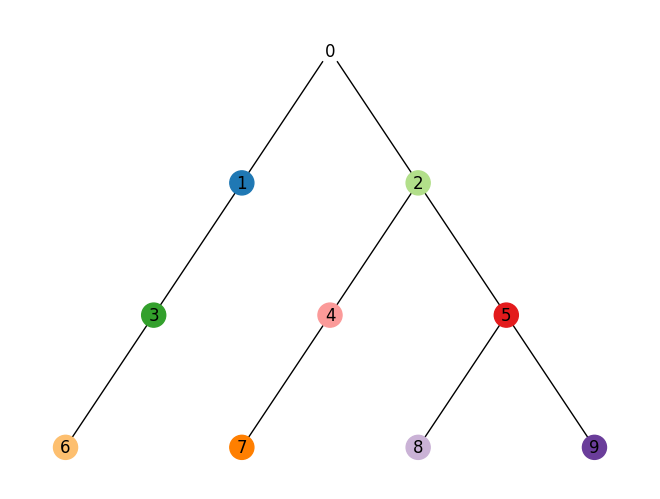

In [17]:
color_hierarchy.visualize_tree()

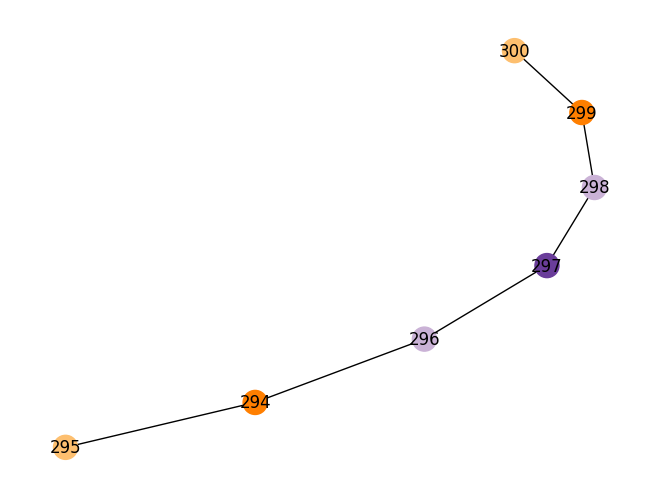

In [18]:
draw_gwl_refined_graph(selected_graph, pos=pos)